In [1141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [1142]:
boston = load_boston()

In [1094]:
#depricated and alternative
'''
import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    dataset. You can load the datasets as follows::

        from sklearn.datasets import fetch_california_housing
        housing = fetch_california_housing()

    for the California housing dataset and::

        from sklearn.datasets import fetch_openml
        housing = fetch_openml(name="house_prices", as_frame=True)
'''

'\nimport pandas as pd\n        import numpy as np\n\n\n        data_url = "http://lib.stat.cmu.edu/datasets/boston"\n        raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)\n        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])\n        target = raw_df.values[1::2, 2]\n\n    Alternative datasets include the California housing dataset (i.e.\n    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing\n    dataset. You can load the datasets as follows::\n\n        from sklearn.datasets import fetch_california_housing\n        housing = fetch_california_housing()\n\n    for the California housing dataset and::\n\n        from sklearn.datasets import fetch_openml\n        housing = fetch_openml(name="house_prices", as_frame=True)\n'

In [1095]:
bostonDataFrameFeatures = pd.DataFrame(boston.data,columns=boston.feature_names)
bostonDataFrameTarget = pd.DataFrame(boston.target,columns=['PRICE'])


In [1096]:
bostonDataFrameFeatures

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [1097]:
bostonDataFrameTarget

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [1098]:
bostonDataFrame = bostonDataFrameFeatures.merge(bostonDataFrameTarget,left_index=True,right_index=True)
#bostonDataFrame.to_csv('/Users/uday_kumar_swamy/Library/CloudStorage/OneDrive-Personal/datascience_videos/machinelearningpractice/machinelearning/dataset/BostonHousing_last.csv')

In [1099]:
bostonDataFrame.shape

(506, 14)

In [1100]:
#to get the information about the dataframe
bostonDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [1101]:
'''
SimpleImputer is a class provided by the scikit-learn library in Python, 
used for handling missing values in datasets. It is part of the sklearn.
impute module and offers a convenient way to impute (fill in) missing values using 
various strategies, making data cleaning and preprocessing more straightforward before 
applying machine learning algorithms.
'''
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer=imputer.fit_transform(bostonDataFrame)

In [1102]:
#re-validate the data for null
bostonDataFrame.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

CRIM          AxesSubplot(0.125,0.11;0.0466867x0.77)
ZN         AxesSubplot(0.181024,0.11;0.0466867x0.77)
INDUS      AxesSubplot(0.237048,0.11;0.0466867x0.77)
CHAS       AxesSubplot(0.293072,0.11;0.0466867x0.77)
NOX        AxesSubplot(0.349096,0.11;0.0466867x0.77)
RM          AxesSubplot(0.40512,0.11;0.0466867x0.77)
AGE        AxesSubplot(0.461145,0.11;0.0466867x0.77)
DIS        AxesSubplot(0.517169,0.11;0.0466867x0.77)
RAD        AxesSubplot(0.573193,0.11;0.0466867x0.77)
TAX        AxesSubplot(0.629217,0.11;0.0466867x0.77)
PTRATIO    AxesSubplot(0.685241,0.11;0.0466867x0.77)
B          AxesSubplot(0.741265,0.11;0.0466867x0.77)
LSTAT      AxesSubplot(0.797289,0.11;0.0466867x0.77)
PRICE      AxesSubplot(0.853313,0.11;0.0466867x0.77)
dtype: object

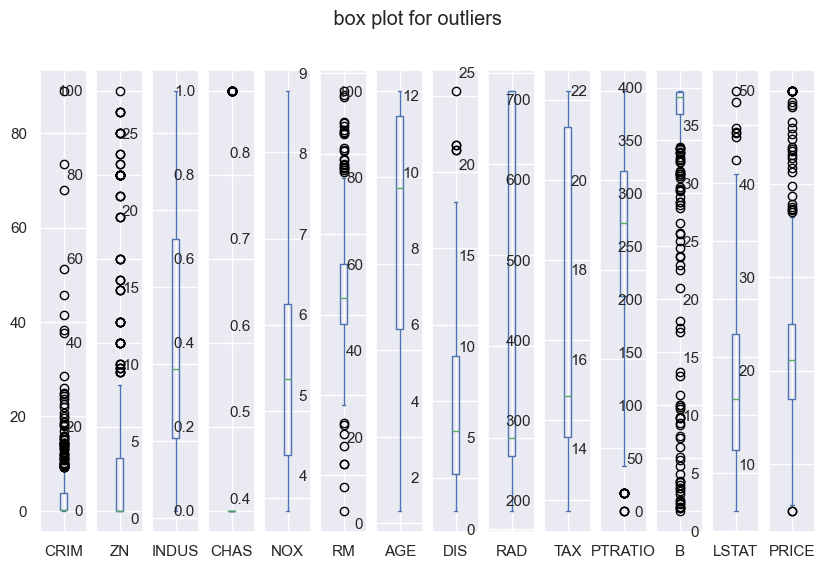

In [1103]:
#now lets see the outliers
bostonDataFrame.plot(kind='box',subplots = True, figsize =(10,6),title = " box plot for outliers")

In [1104]:
list_features = ['CRIM', 'ZN', 'INDUS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE']
def fixOutliers(list_features):
    for feature in list_features:
        q1,q3 = np.quantile(bostonDataFrame[feature],[0.25,0.75])
        interQuantileRange = q3-q1
        lowerLevel = q1-1.5*interQuantileRange
        upperLevel = q3+1.5*interQuantileRange
        bostonDataFrame[feature] = np.where(bostonDataFrame[feature]<lowerLevel,lowerLevel,bostonDataFrame[feature])
        bostonDataFrame[feature] = np.where(bostonDataFrame[feature]>upperLevel,upperLevel,bostonDataFrame[feature])
fixOutliers(list_features)    

CRIM          AxesSubplot(0.125,0.11;0.0466867x0.77)
ZN         AxesSubplot(0.181024,0.11;0.0466867x0.77)
INDUS      AxesSubplot(0.237048,0.11;0.0466867x0.77)
CHAS       AxesSubplot(0.293072,0.11;0.0466867x0.77)
NOX        AxesSubplot(0.349096,0.11;0.0466867x0.77)
RM          AxesSubplot(0.40512,0.11;0.0466867x0.77)
AGE        AxesSubplot(0.461145,0.11;0.0466867x0.77)
DIS        AxesSubplot(0.517169,0.11;0.0466867x0.77)
RAD        AxesSubplot(0.573193,0.11;0.0466867x0.77)
TAX        AxesSubplot(0.629217,0.11;0.0466867x0.77)
PTRATIO    AxesSubplot(0.685241,0.11;0.0466867x0.77)
B          AxesSubplot(0.741265,0.11;0.0466867x0.77)
LSTAT      AxesSubplot(0.797289,0.11;0.0466867x0.77)
PRICE      AxesSubplot(0.853313,0.11;0.0466867x0.77)
dtype: object

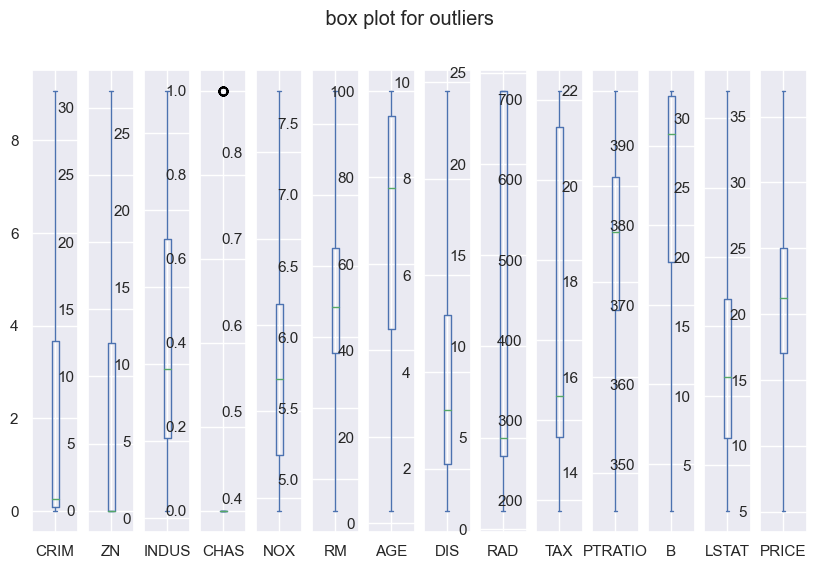

In [1105]:
#validate the outliers again
bostonDataFrame.plot(kind='box',subplots = True, figsize =(10,6),title = " box plot for outliers")

In [1090]:
bostonDataFrame.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

'\nThe histogram also shows that columns CRIM, ZN, B has highly skewed distributions. \nAlso PRICE looks to have a normal distribution (the predictions) and other colums seem to have normal or \nbimodel ditribution of data except CHAS (which is a discrete variable).\n'

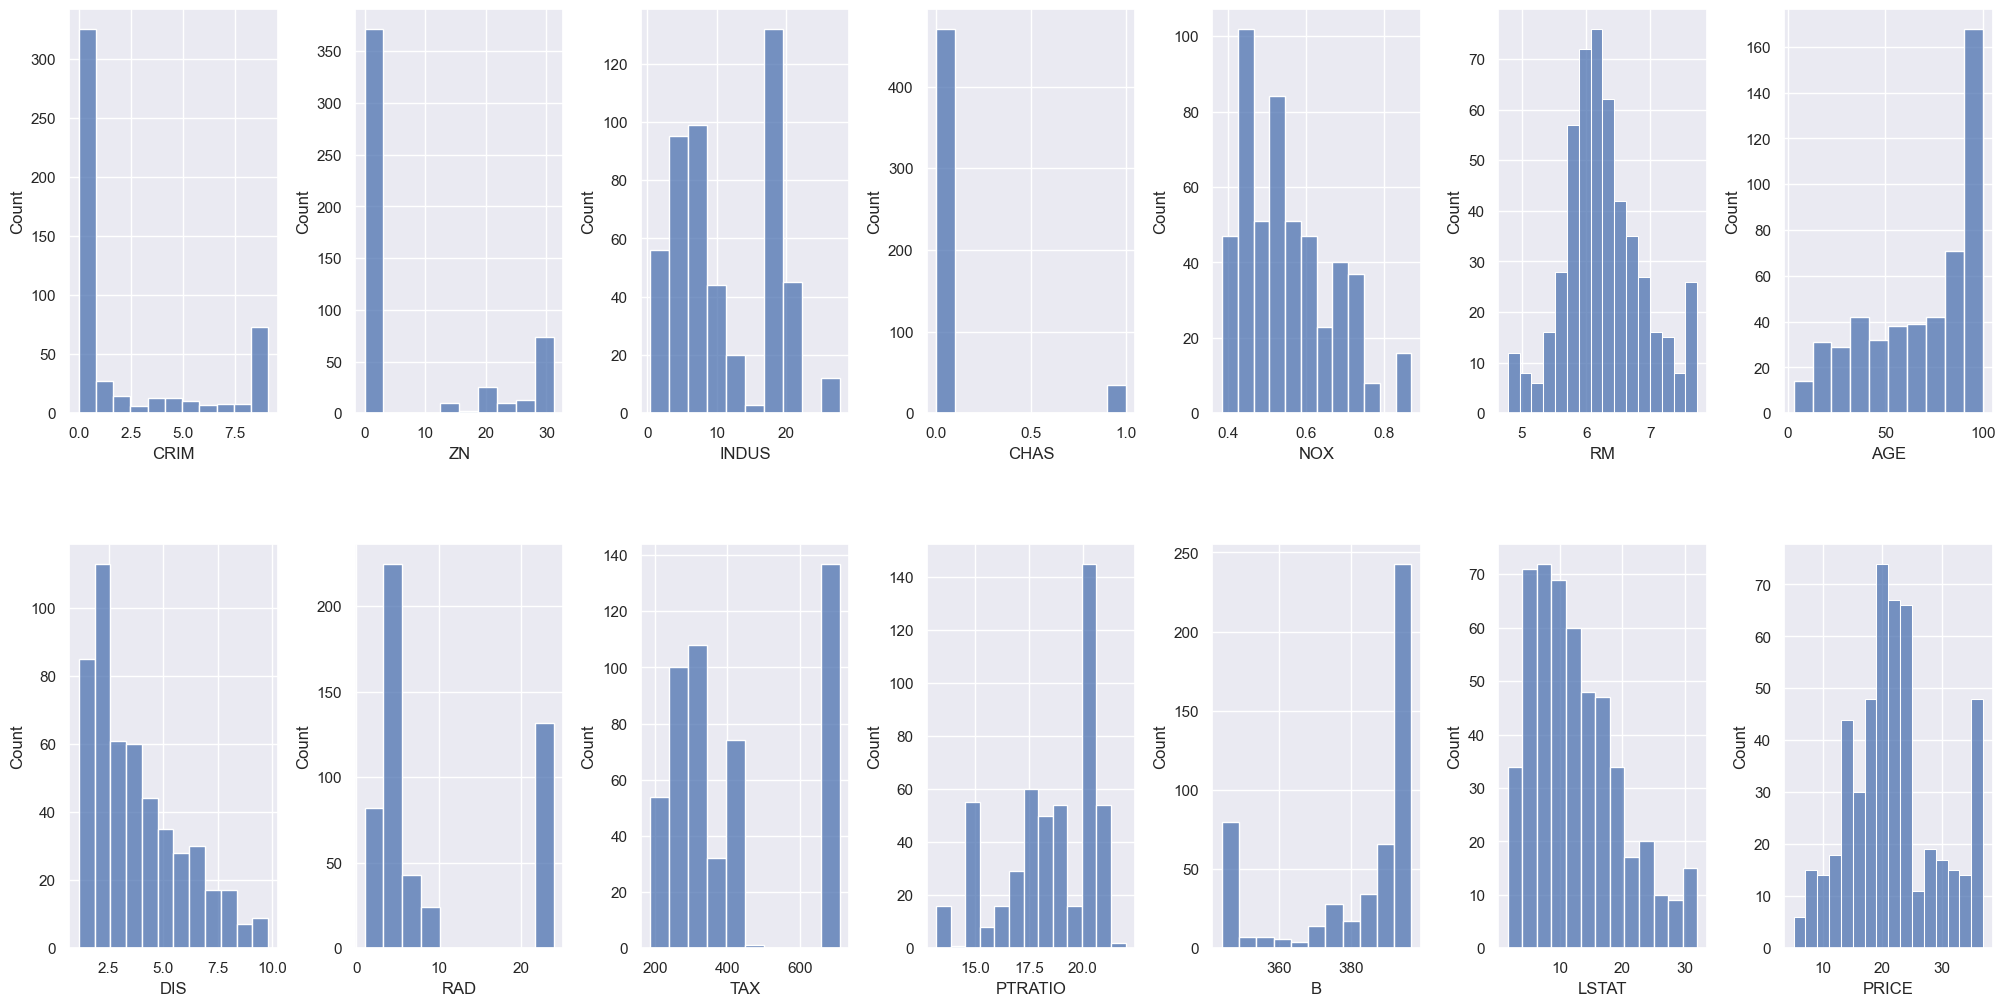

In [1106]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in bostonDataFrame.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
'''
The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. 
Also PRICE looks to have a normal distribution (the predictions) and other colums seem to have normal or 
bimodel ditribution of data except CHAS (which is a discrete variable).
'''

"\nFrom correlation matrix, we see TAX and RAD are highly correlated features. \nThe columns LSTAT, INDUS, RM, TAX, PTRAIO has a correlation score above 0.5 with \nLet's plot these columns against PRICE.\n"

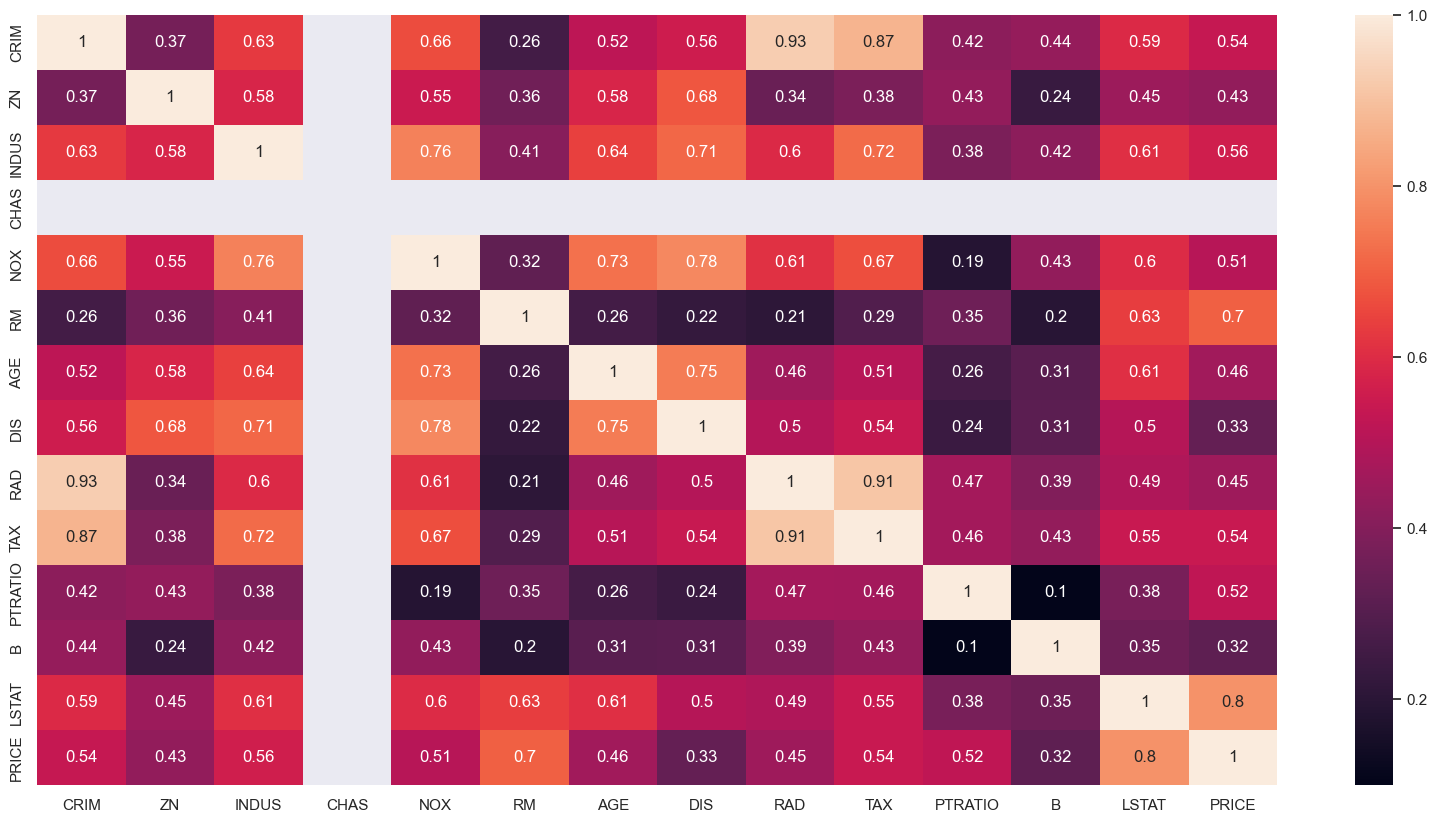

In [1092]:
#lets see the co-relation matrix in heat map
plt.figure(figsize=(20, 10))
sns.heatmap(bostonDataFrame.corr().abs(),  annot=True)
'''
From correlation matrix, we see TAX and RAD are highly correlated features. 
The columns CRIM,LSTAT, INDUS, RM, TAX, PTRATIO,NOX,CHAS has a correlation score above 0.5 with PRICE
Let's plot these columns against PRICE.
'''

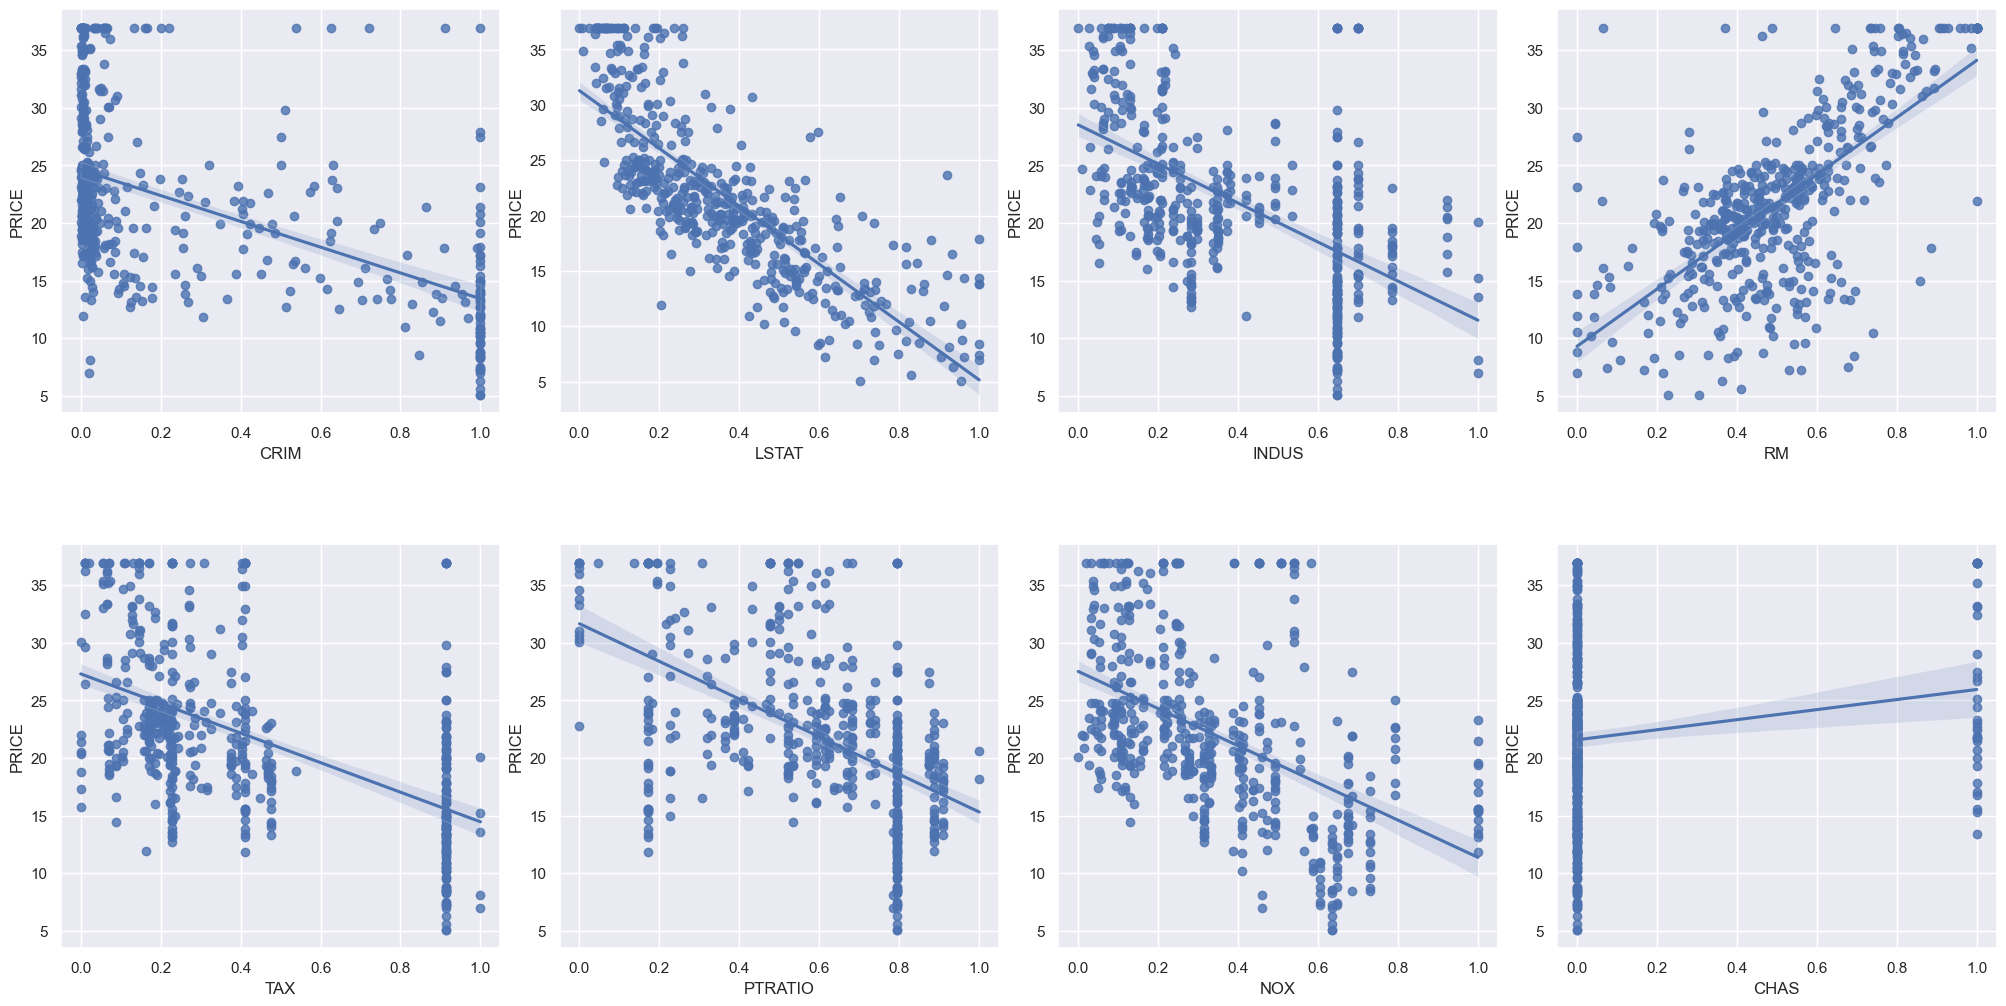

In [1140]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against PRICE
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['CRIM','LSTAT', 'INDUS', 'RM', 'TAX', 'PTRATIO','NOX','CHAS']
x = bostonDataFrame.loc[:,column_sels]
y = bostonDataFrame['PRICE']
x = pd.DataFrame(data= min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [1123]:
#above we can see all the outliers has been resolved
'''
now will devide the data into features and target
'''
features = bostonDataFrame[['CRIM','LSTAT', 'INDUS', 'RM', 'TAX', 'PTRATIO','NOX','CHAS','AGE']]
target = bostonDataFrame['PRICE']

In [1124]:
features.head()

,CRIM,LSTAT,INDUS,RM,TAX,PTRATIO,NOX,CHAS,AGE
0,0.00632,4.98,2.31,6.575,296.0,15.3,0.538,0.0,65.2
1,0.02731,9.14,7.07,6.421,242.0,17.8,0.469,0.0,78.9
2,0.02729,4.03,7.07,7.185,242.0,17.8,0.469,0.0,61.1
3,0.03237,2.94,2.18,6.998,222.0,18.7,0.458,0.0,45.8
4,0.06905,5.33,2.18,7.147,222.0,18.7,0.458,0.0,54.2


In [1125]:
target.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [1126]:
'''
now we will split the data into test and train
'''
from sklearn.model_selection import train_test_split

feature_train, feature_test , target_train , target_test = train_test_split(features,target,train_size=0.75,random_state=1)

In [1127]:
#now we can call the linear regression model to train the data and predict the outcome
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(feature_train,target_train)
target_test_predicted = linear_regression.predict(feature_test)
target_train_predicted = linear_regression.predict(feature_train)

In [1128]:
feature_train.columns

Index(['CRIM', 'LSTAT', 'INDUS', 'RM', 'TAX', 'PTRATIO', 'NOX', 'CHAS', 'AGE'], dtype='object')

In [1129]:
#to check the coeff
coef=linear_regression.coef_
intercept = linear_regression.intercept_
coef,intercept
cList = []
for c in list(coef):
    cList.append(abs(c))
    
coefDf = pd.DataFrame([cList],columns=feature_train.columns)
coefDf

,CRIM,LSTAT,INDUS,RM,TAX,PTRATIO,NOX,CHAS,AGE
0,0.053075,0.540732,0.021345,2.862272,0.001864,0.818596,10.096421,2.169031,0.01909


In [1130]:
#dataFrame.corr()

In [1131]:
#now lets check the accracy
from sklearn.metrics import mean_squared_error,r2_score
rmse_train = np.sqrt(mean_squared_error(target_train,target_train_predicted))
rmse_test = np.sqrt(mean_squared_error(target_test,target_test_predicted))
np.round(rmse_train,2),np.round(rmse_test,2)

(3.73, 3.97)

In [1132]:
r2_train = r2_score(target_train,target_train_predicted)
r2_test = r2_score(target_test,target_test_predicted)
np.round(r2_train,2),np.round(r2_test,2)

(0.75, 0.75)

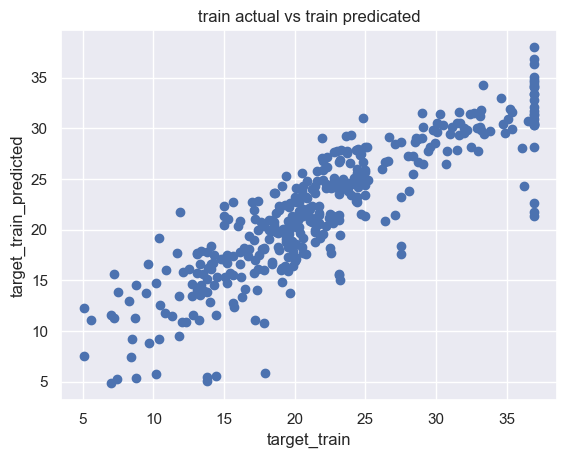

In [1133]:
plt.scatter(target_train,target_train_predicted)
plt.xlabel('target_train')
plt.ylabel('target_train_predicted')
plt.title('train actual vs train predicated')
plt.show()

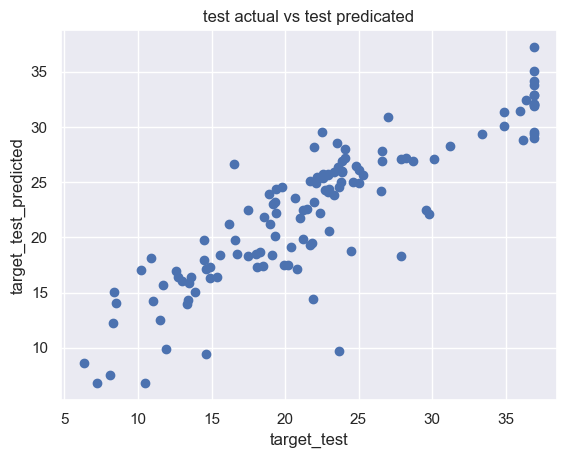

In [1134]:
plt.scatter(target_test,target_test_predicted,)
plt.xlabel('target_test')
plt.ylabel('target_test_predicted')
plt.title('test actual vs test predicated')
plt.show()

In [1135]:
pd.DataFrame({'Actual':target_test,'Predicted':target_test_predicted}).head(20)

,Actual,Predicted
307,28.2000,27.157679
343,23.9000,26.934447
47,16.6000,19.751224
67,22.0000,23.217724
362,20.8000,17.180348
132,23.0000,20.600047
292,27.9000,27.142348
31,14.5000,19.764621
218,21.5000,22.589046
90,22.6000,25.405051
